In [1]:
pip install roboflow ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 905.3/905.3 kB 24.5 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [2]:
# Import necessary libraries
from roboflow import Roboflow
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
rf = Roboflow(api_key="QiWe3n7O0uINCWF8Lc8M")
project = rf.workspace("final-project-u99me").project("letter-hunter")
version = project.version(3)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Letter-Hunter--3 in yolov8:: 100%|██████████| 840/840 [00:00<00:00, 3150.42it/s]


In [4]:
# Step 2: Verify dataset structure
dataset_path = dataset.location  # Get the dataset location
data_yaml_path = dataset_path + "/data.yaml"  # Path to the data.yaml file

# Print dataset info
print(f"Dataset downloaded to: {dataset_path}")
print(f"Data configuration file: {data_yaml_path}")

Dataset downloaded to: /content/Letter-Hunter--3
Data configuration file: /content/Letter-Hunter--3/data.yaml


In [5]:
!pip install ultralytics

In [6]:
# Step 3: Train the YOLOv8 model
# Load the YOLOv8 model
model = YOLO("yolov8n-oiv7.pt")

# Train the model
model.train(
    data=data_yaml_path,          # Path to the data.yaml file
    epochs=100,                    # Number of training epochs
    imgsz=640,                    # Image size (640x640)
    batch=8,                     # Batch size (adjust based on your GPU memory)
    name="yolov8_letter_hunter",  # Name of the training run
    project="runsnew/train",         # Directory for training runs
)

100%|██████████| 6.89M/6.89M [00:00<00:00, 126MB/s]


Ultralytics 8.3.58 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n-oiv7.pt, data=/content/Letter-Hunter--3/data.yaml, epochs=100, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=runsnew/train, name=yolov8_letter_hunter, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_l

100%|██████████| 755k/755k [00:00<00:00, 20.8MB/s]


Overriding model.yaml nc=601 with nc=30

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralyti

100%|██████████| 5.35M/5.35M [00:00<00:00, 61.4MB/s]


AMP: checks passed ✅


train: Scanning /content/Letter-Hunter--3/train/labels... 360 images, 3 backgrounds, 0 corrupt: 100%|██████████| 360/360 [00:00<00:00, 1922.12it/s]


train: New cache created: /content/Letter-Hunter--3/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.24 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/Letter-Hunter--3/valid/labels... 28 images, 0 backgrounds, 0 corrupt: 100%|██████████| 28/28 [00:00<00:00, 1330.17it/s]

val: New cache created: /content/Letter-Hunter--3/valid/labels.cache


Plotting labels to runsnew/train/yolov8_letter_hunter/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000294, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runsnew/train/yolov8_letter_hunter
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      1.22G       1.16      4.479       1.39         34        640: 100%|██████████| 45/45 [00:09<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.79it/s]

                   all         28        114          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      1.21G      1.089      4.121      1.338         31        640: 100%|██████████| 45/45 [00:09<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.26it/s]

                   all         28        114     0.0261      0.538      0.171      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      1.23G      1.082      3.619      1.358         31        640: 100%|██████████| 45/45 [00:07<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.00it/s]

                   all         28        114      0.446      0.275      0.266      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      1.21G      1.125      3.219      1.378         23        640: 100%|██████████| 45/45 [00:08<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.53it/s]

                   all         28        114      0.471      0.353      0.323      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      1.18G       1.12      2.831       1.37         26        640: 100%|██████████| 45/45 [00:08<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.19it/s]


                   all         28        114      0.579      0.381      0.426      0.285

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      1.18G        1.1      2.563      1.354         36        640: 100%|██████████| 45/45 [00:07<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.61it/s]

                   all         28        114      0.557      0.511      0.512      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      1.19G       1.12       2.43      1.359         25        640: 100%|██████████| 45/45 [00:09<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.23it/s]

                   all         28        114      0.881      0.433      0.565      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      1.18G      1.085      2.228      1.353         34        640: 100%|██████████| 45/45 [00:06<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.11it/s]

                   all         28        114       0.78      0.485      0.645      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      1.16G      1.087      2.102      1.341         29        640: 100%|██████████| 45/45 [00:09<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.95it/s]

                   all         28        114      0.463      0.706      0.694      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      1.17G       1.08      1.976      1.321         38        640: 100%|██████████| 45/45 [00:06<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.29it/s]

                   all         28        114      0.643      0.735      0.745      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      1.17G      1.058      1.954      1.315         43        640: 100%|██████████| 45/45 [00:08<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.35it/s]

                   all         28        114      0.731       0.63      0.736      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      1.18G      1.065      1.844      1.342         30        640: 100%|██████████| 45/45 [00:07<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.12it/s]


                   all         28        114      0.595      0.762      0.771      0.541

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      1.17G      1.047      1.782      1.293         31        640: 100%|██████████| 45/45 [00:08<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.32it/s]

                   all         28        114      0.678      0.757      0.767       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      1.18G      1.002      1.732      1.276         56        640: 100%|██████████| 45/45 [00:07<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.05it/s]

                   all         28        114      0.695      0.789        0.8      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      1.19G      1.017      1.645      1.276         46        640: 100%|██████████| 45/45 [00:07<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.04it/s]

                   all         28        114      0.714      0.765      0.801      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      1.18G     0.9809      1.635       1.28         33        640: 100%|██████████| 45/45 [00:09<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.88it/s]


                   all         28        114       0.68      0.785      0.811      0.614

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      1.17G     0.9609      1.591      1.254         30        640: 100%|██████████| 45/45 [00:06<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.78it/s]

                   all         28        114      0.815      0.706      0.836      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      1.17G     0.9859      1.552       1.27         40        640: 100%|██████████| 45/45 [00:09<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.69it/s]

                   all         28        114      0.795      0.737      0.844      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      1.21G     0.9467      1.519      1.248         34        640: 100%|██████████| 45/45 [00:06<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.35it/s]

                   all         28        114      0.783      0.719      0.844       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      1.17G     0.9537      1.475      1.236         25        640: 100%|██████████| 45/45 [00:09<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.84it/s]

                   all         28        114      0.659      0.782      0.818      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      1.19G     0.9192      1.455      1.236         47        640: 100%|██████████| 45/45 [00:06<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.14it/s]

                   all         28        114      0.827      0.786      0.833      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      1.17G     0.9363      1.401      1.222         25        640: 100%|██████████| 45/45 [00:09<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.81it/s]

                   all         28        114      0.818       0.72      0.813      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      1.19G      0.936      1.394      1.223         24        640: 100%|██████████| 45/45 [00:06<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.16it/s]

                   all         28        114      0.847      0.755      0.833      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      1.17G     0.9519      1.381      1.234         30        640: 100%|██████████| 45/45 [00:08<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.31it/s]

                   all         28        114      0.824      0.746      0.852      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      1.17G     0.9053      1.281      1.205         40        640: 100%|██████████| 45/45 [00:07<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.84it/s]

                   all         28        114       0.73      0.797      0.841      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      1.17G     0.8838      1.267        1.2         37        640: 100%|██████████| 45/45 [00:07<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.80it/s]

                   all         28        114      0.804      0.793      0.846       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      1.17G     0.9005      1.258      1.212         33        640: 100%|██████████| 45/45 [00:08<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.79it/s]


                   all         28        114      0.825      0.753      0.864       0.67

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      1.16G     0.9133      1.354       1.24         30        640: 100%|██████████| 45/45 [00:06<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.90it/s]

                   all         28        114      0.803      0.779      0.857      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      1.15G     0.8988      1.279      1.199         31        640: 100%|██████████| 45/45 [00:09<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.92it/s]

                   all         28        114      0.831      0.756      0.852      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      1.18G     0.8683      1.238      1.187         29        640: 100%|██████████| 45/45 [00:06<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.69it/s]

                   all         28        114        0.8      0.705      0.856      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      1.17G     0.8454      1.216      1.164         45        640: 100%|██████████| 45/45 [00:09<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.14it/s]

                   all         28        114      0.806       0.73      0.866      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      1.18G     0.8699      1.212      1.171         23        640: 100%|██████████| 45/45 [00:06<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.40it/s]

                   all         28        114      0.767      0.777      0.848      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      1.17G     0.8586      1.241      1.187         14        640: 100%|██████████| 45/45 [00:09<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.35it/s]

                   all         28        114      0.788      0.739      0.844      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      1.19G     0.8829      1.231       1.19         40        640: 100%|██████████| 45/45 [00:06<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.49it/s]

                   all         28        114       0.85       0.73      0.848      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      1.16G     0.8874      1.211        1.2         28        640: 100%|██████████| 45/45 [00:09<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.02it/s]

                   all         28        114      0.812      0.769      0.838      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      1.17G     0.8454      1.155      1.165         30        640: 100%|██████████| 45/45 [00:06<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.76it/s]

                   all         28        114      0.837      0.767      0.847      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100       1.2G     0.8528      1.151      1.173         38        640: 100%|██████████| 45/45 [00:08<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.63it/s]

                   all         28        114      0.767      0.797      0.836      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      1.16G      0.851        1.1      1.154         38        640: 100%|██████████| 45/45 [00:07<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.36it/s]

                   all         28        114      0.761      0.765      0.872      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      1.16G     0.8772      1.169      1.191         60        640: 100%|██████████| 45/45 [00:08<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.49it/s]

                   all         28        114        0.8      0.725      0.869      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      1.18G     0.8245        1.1      1.169         34        640: 100%|██████████| 45/45 [00:07<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.17it/s]


                   all         28        114      0.811      0.742      0.888       0.68

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      1.18G     0.8273      1.097      1.155         65        640: 100%|██████████| 45/45 [00:07<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.23it/s]

                   all         28        114      0.761      0.778      0.877      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      1.17G      0.818      1.095      1.159         33        640: 100%|██████████| 45/45 [00:08<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.93it/s]

                   all         28        114      0.901      0.692      0.877      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      1.16G     0.8247      1.101      1.162         35        640: 100%|██████████| 45/45 [00:06<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.97it/s]

                   all         28        114      0.889      0.695      0.845      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      1.19G     0.7845      1.017      1.123         52        640: 100%|██████████| 45/45 [00:09<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.52it/s]

                   all         28        114       0.77      0.766      0.872      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      1.21G     0.7997      1.092      1.157         38        640: 100%|██████████| 45/45 [00:06<00:00,  6.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.10it/s]

                   all         28        114      0.851      0.753      0.875      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      1.21G      0.804      1.069      1.143         33        640: 100%|██████████| 45/45 [00:09<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.85it/s]

                   all         28        114      0.846      0.765      0.862      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      1.16G     0.7629     0.9954      1.116         28        640: 100%|██████████| 45/45 [00:06<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.45it/s]

                   all         28        114      0.883      0.735      0.838      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      1.21G     0.7754      1.011      1.115         54        640: 100%|██████████| 45/45 [00:09<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.26it/s]

                   all         28        114       0.85      0.735      0.861      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      1.16G     0.8123      1.045      1.147         52        640: 100%|██████████| 45/45 [00:07<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.37it/s]


                   all         28        114       0.89      0.701      0.865      0.642

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      1.17G     0.7631     0.9823      1.121         35        640: 100%|██████████| 45/45 [00:08<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.86it/s]

                   all         28        114      0.855      0.754      0.866      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      1.18G     0.7895      1.005      1.111         34        640: 100%|██████████| 45/45 [00:07<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.41it/s]

                   all         28        114      0.848       0.76      0.871      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      1.19G     0.7709      1.001      1.122         32        640: 100%|██████████| 45/45 [00:07<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.43it/s]

                   all         28        114      0.836      0.761      0.873      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      1.17G     0.7624     0.9622       1.11         42        640: 100%|██████████| 45/45 [00:08<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.39it/s]

                   all         28        114      0.769       0.77      0.868      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      1.19G     0.7515     0.9734        1.1         31        640: 100%|██████████| 45/45 [00:06<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.21it/s]

                   all         28        114      0.671      0.823      0.868      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      1.17G     0.7551     0.9776      1.108         36        640: 100%|██████████| 45/45 [00:09<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.16it/s]

                   all         28        114      0.802      0.773      0.862      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      1.17G     0.7258     0.9594      1.104         28        640: 100%|██████████| 45/45 [00:06<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.81it/s]

                   all         28        114       0.84      0.731      0.874       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      1.18G      0.776     0.9965       1.12         36        640: 100%|██████████| 45/45 [00:09<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.67it/s]

                   all         28        114      0.831      0.733      0.871      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      1.21G      0.723     0.9424      1.089         47        640: 100%|██████████| 45/45 [00:06<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.16it/s]

                   all         28        114      0.856      0.696      0.867      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      1.18G     0.7498     0.9329      1.095         39        640: 100%|██████████| 45/45 [00:09<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.12it/s]

                   all         28        114      0.875      0.739      0.875      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      1.19G     0.7397     0.9508      1.108         39        640: 100%|██████████| 45/45 [00:06<00:00,  6.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.34it/s]

                   all         28        114      0.873      0.725      0.867      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      1.18G     0.7579     0.9708      1.116         43        640: 100%|██████████| 45/45 [00:09<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.29it/s]

                   all         28        114      0.842      0.728      0.866      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      1.21G     0.7416     0.9034      1.078         51        640: 100%|██████████| 45/45 [00:07<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.68it/s]


                   all         28        114      0.788      0.758      0.847      0.642

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      1.18G     0.7314     0.9367      1.093         28        640: 100%|██████████| 45/45 [00:08<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.54it/s]

                   all         28        114       0.85      0.704      0.864      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      1.17G     0.7174     0.9047      1.085         29        640: 100%|██████████| 45/45 [00:07<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.45it/s]


                   all         28        114      0.874      0.705      0.866      0.669

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      1.17G     0.6965      0.905      1.089         42        640: 100%|██████████| 45/45 [00:08<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.83it/s]

                   all         28        114       0.87      0.748      0.868      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      1.19G     0.6702     0.8846      1.065         24        640: 100%|██████████| 45/45 [00:08<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.97it/s]


                   all         28        114      0.866      0.761      0.867      0.652

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      1.24G     0.7301     0.9386      1.091         40        640: 100%|██████████| 45/45 [00:07<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.01it/s]

                   all         28        114       0.87      0.732      0.869      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      1.17G     0.7051     0.9014      1.082         34        640: 100%|██████████| 45/45 [00:08<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.97it/s]


                   all         28        114      0.843      0.736      0.873      0.659

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      1.25G     0.7366     0.9148      1.081         36        640: 100%|██████████| 45/45 [00:06<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.29it/s]

                   all         28        114      0.823      0.761      0.857      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      1.16G     0.6971     0.9007      1.097         31        640: 100%|██████████| 45/45 [00:09<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.56it/s]

                   all         28        114       0.82      0.771       0.84      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      1.17G     0.6876     0.8693      1.063         31        640: 100%|██████████| 45/45 [00:06<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.53it/s]


                   all         28        114       0.85      0.754      0.857      0.652

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      1.19G     0.6766     0.8797      1.067         33        640: 100%|██████████| 45/45 [00:09<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.99it/s]

                   all         28        114      0.819      0.735      0.836      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      1.17G      0.652     0.8466      1.056         20        640: 100%|██████████| 45/45 [00:06<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.55it/s]

                   all         28        114      0.831      0.755      0.846      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      1.17G     0.6986     0.8472      1.083         24        640: 100%|██████████| 45/45 [00:09<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.77it/s]

                   all         28        114      0.796      0.765      0.853      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      1.18G     0.6969     0.8771      1.067         26        640: 100%|██████████| 45/45 [00:06<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.38it/s]


                   all         28        114      0.759      0.764       0.85      0.641

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      1.18G     0.6763     0.8752      1.085         31        640: 100%|██████████| 45/45 [00:09<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.59it/s]

                   all         28        114      0.833      0.759      0.851      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      1.17G     0.6817     0.8541      1.061         55        640: 100%|██████████| 45/45 [00:07<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.15it/s]

                   all         28        114      0.787      0.783      0.851      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      1.19G     0.6754     0.8611      1.072         27        640: 100%|██████████| 45/45 [00:08<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.02it/s]

                   all         28        114      0.877      0.729      0.846      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      1.17G     0.6539     0.8272      1.051         61        640: 100%|██████████| 45/45 [00:08<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.55it/s]

                   all         28        114      0.878      0.721      0.852      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      1.19G     0.6724     0.8391      1.054         25        640: 100%|██████████| 45/45 [00:07<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.20it/s]

                   all         28        114      0.864      0.718      0.851      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      1.17G     0.6636     0.8309      1.063         29        640: 100%|██████████| 45/45 [00:09<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.66it/s]

                   all         28        114      0.827      0.771      0.847      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      1.21G     0.6953     0.8459       1.08         29        640: 100%|██████████| 45/45 [00:06<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.90it/s]

                   all         28        114      0.828      0.762      0.852      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      1.17G     0.6486     0.8268      1.039         35        640: 100%|██████████| 45/45 [00:09<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.39it/s]

                   all         28        114      0.868       0.75      0.848      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      1.17G     0.6687     0.8394      1.065         18        640: 100%|██████████| 45/45 [00:06<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.70it/s]

                   all         28        114      0.866      0.752      0.847      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      1.15G     0.6636     0.8596       1.08         36        640: 100%|██████████| 45/45 [00:09<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.50it/s]

                   all         28        114      0.844       0.76      0.831      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      1.16G     0.6684     0.8402      1.079         30        640: 100%|██████████| 45/45 [00:06<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.85it/s]

                   all         28        114      0.777      0.777      0.846      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      1.19G     0.6567     0.8333      1.072         28        640: 100%|██████████| 45/45 [00:09<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.23it/s]

                   all         28        114      0.777       0.78      0.844      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      1.24G      0.658     0.8124      1.055         34        640: 100%|██████████| 45/45 [00:07<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.27it/s]


                   all         28        114      0.844       0.76      0.838      0.648

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      1.21G     0.6294     0.8187      1.054         38        640: 100%|██████████| 45/45 [00:08<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.76it/s]

                   all         28        114      0.812       0.77      0.837      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      1.21G     0.6541     0.8328      1.058         27        640: 100%|██████████| 45/45 [00:07<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.10it/s]


                   all         28        114      0.806      0.774      0.844       0.65
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      1.18G     0.5451      0.873      1.013         20        640: 100%|██████████| 45/45 [00:08<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.99it/s]

                   all         28        114      0.842      0.749      0.853      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      1.16G     0.5373     0.8435      1.015         10        640: 100%|██████████| 45/45 [00:09<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.97it/s]


                   all         28        114      0.833      0.748      0.852      0.645

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      1.17G     0.5329     0.8589      1.018         27        640: 100%|██████████| 45/45 [00:06<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.60it/s]

                   all         28        114      0.861      0.736      0.851      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      1.16G      0.543     0.8403     0.9948         12        640: 100%|██████████| 45/45 [00:09<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.69it/s]

                   all         28        114      0.872      0.744      0.851      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      1.16G     0.5255     0.8178     0.9949         15        640: 100%|██████████| 45/45 [00:06<00:00,  7.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.00it/s]

                   all         28        114      0.865      0.742      0.858      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      1.18G     0.5055     0.8111     0.9979         34        640: 100%|██████████| 45/45 [00:09<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.85it/s]

                   all         28        114      0.862      0.745      0.858      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      1.16G     0.4977     0.8011     0.9713         12        640: 100%|██████████| 45/45 [00:06<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.25it/s]

                   all         28        114      0.852      0.748      0.859      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      1.18G     0.5031     0.7953     0.9659         15        640: 100%|██████████| 45/45 [00:09<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.89it/s]

                   all         28        114      0.857      0.747      0.861      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      1.16G     0.5245     0.8202      0.989         38        640: 100%|██████████| 45/45 [00:06<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.30it/s]

                   all         28        114      0.853      0.747      0.861      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      1.18G     0.5218     0.8088     0.9977         18        640: 100%|██████████| 45/45 [00:09<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.96it/s]

                   all         28        114      0.851      0.749      0.861      0.654



100 epochs completed in 0.254 hours.
Optimizer stripped from runsnew/train/yolov8_letter_hunter/weights/last.pt, 6.3MB
Optimizer stripped from runsnew/train/yolov8_letter_hunter/weights/best.pt, 6.3MB

Validating runsnew/train/yolov8_letter_hunter/weights/best.pt...
Ultralytics 8.3.58 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3,011,498 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.40it/s]


                   all         28        114      0.812      0.742      0.888       0.68
               Airpods          1          1      0.658          1      0.995      0.796
                   Bag          1          1      0.886          1      0.995      0.995
                 Board          2          2      0.463          1      0.995      0.747
              Car Keys          2          2      0.622          1      0.995      0.796
            Cell Phone          7          7      0.542      0.714      0.867      0.626
                 Chair          2          2      0.843          1      0.995      0.796
           Chess Board          1          1      0.783          1      0.995      0.895
           Chess Piece          1         31          1      0.508      0.853      0.343
                 Couch          1          1      0.788          1      0.995      0.995
                   Cup          3          3      0.876          1      0.995      0.708
                  Doo

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ddb14191a50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.0

In [9]:
model = YOLO("/content/runsnew/train/yolov8_letter_hunter/weights/best.pt")

In [10]:
# Evaluate the model on the test set
metrics = model.val(data=data_yaml_path, split="test")

Ultralytics 8.3.58 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3,011,498 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/Letter-Hunter--3/test/labels.cache... 26 images, 0 backgrounds, 0 corrupt: 100%|██████████| 26/26 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.89it/s]


                   all         26         71      0.678       0.87      0.881      0.671
               Airpods          2          2      0.781          1      0.995      0.896
                   Bag          1          1       0.63          1      0.995      0.895
                 Board          2          2      0.509          1      0.995      0.796
              Car Keys          2          2      0.755          1      0.995      0.574
            Cell Phone          2          2      0.744          1      0.995      0.945
                 Chair          2          6          1          0      0.195     0.0965
           Chess Board          2          2      0.764          1      0.995      0.822
           Chess Piece          1         12       0.12      0.667      0.138     0.0399
                 Couch          1          1      0.642          1      0.995      0.895
                   Cup          2          2      0.594          1      0.995      0.747
                  Doo

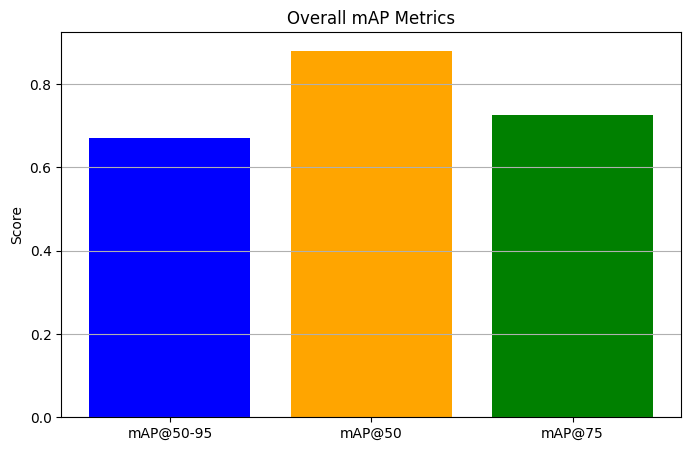

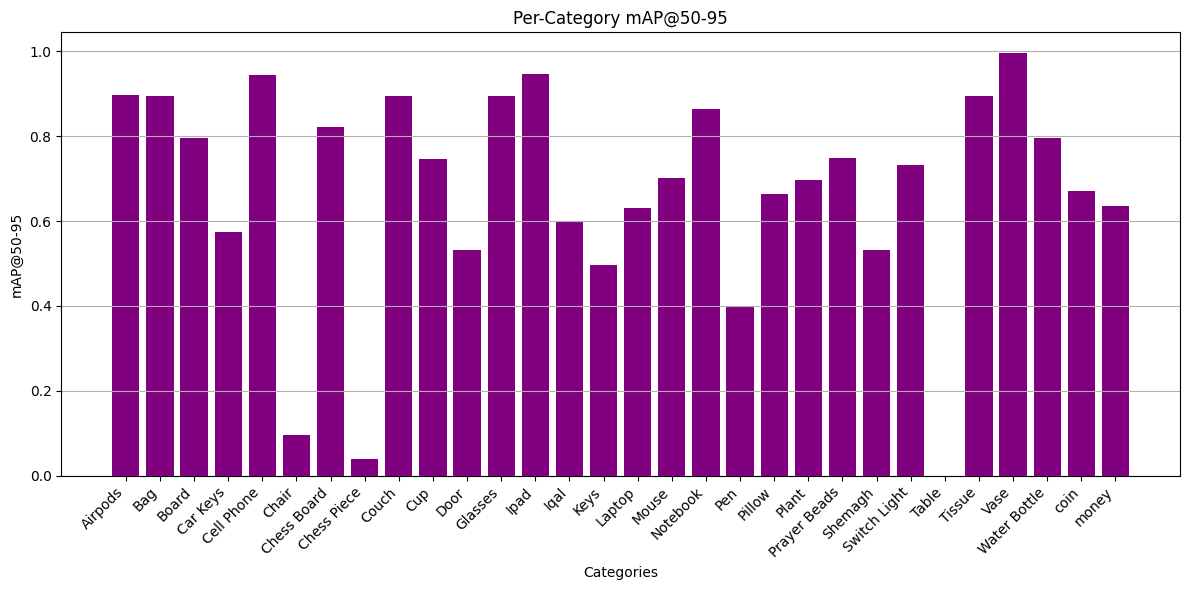

In [11]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Extract overall metrics
map50_95 = metrics.box.map  # Overall mAP 50-95
map50 = metrics.box.map50   # mAP at IoU 50
map75 = metrics.box.map75   # mAP at IoU 75
category_maps = metrics.box.maps  # List of mAP 50-95 for each category
class_names = metrics.names  # Dictionary mapping indices to class names

# Map class indices to names
class_labels = [class_names[i] for i in range(len(category_maps))]

# Overall mAP visualization
plt.figure(figsize=(8, 5))
plt.bar(['mAP@50-95', 'mAP@50', 'mAP@75'], [map50_95, map50, map75], color=['blue', 'orange', 'green'])
plt.title('Overall mAP Metrics')
plt.ylabel('Score')
plt.grid(axis='y')
plt.show()

# Per-category mAP visualization
if category_maps.any():
    x_indices = np.arange(len(category_maps))

    plt.figure(figsize=(12, 6))
    plt.bar(x_indices, category_maps, color='purple')
    plt.title('Per-Category mAP@50-95')
    plt.xlabel('Categories')
    plt.ylabel('mAP@50-95')
    plt.xticks(x_indices, class_labels, rotation=45, ha="right")  # Label bars with class names
    plt.tight_layout()
    plt.grid(axis='y')
    plt.show()





WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/140) /content/keys.mp4: 640x384 (no detections), 35.5ms
video 1/1 (frame 2/140) /content/keys.mp4: 640x384 (no detections), 6.6ms
video 1/1 (frame 3/140) /content/keys.mp4: 640x384 (no detections), 6.8ms
video 1/1 (frame 4/140) /content/keys.mp4: 640x384 (no detections), 6.3ms
video 1/1 (frame 5/140) /content/keys.mp4: 640x384 (no detections), 6.3ms
video 1/1 (frame 6/140) /content/keys.mp4: 640x384 (no detections), 6.6ms
video 1/1 (

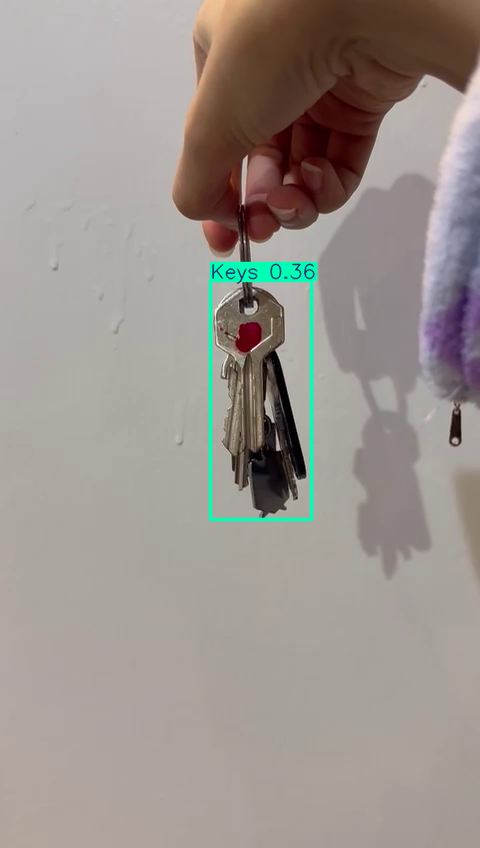

None


In [12]:
test1 = model.predict('/content/keys.mp4', save=True)
print(test1[123].show())



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/104) /content/money.mp4: 640x384 1 money, 7.2ms
video 1/1 (frame 2/104) /content/money.mp4: 640x384 1 money, 6.6ms
video 1/1 (frame 3/104) /content/money.mp4: 640x384 1 money, 10.6ms
video 1/1 (frame 4/104) /content/money.mp4: 640x384 1 money, 11.4ms
video 1/1 (frame 5/104) /content/money.mp4: 640x384 1 money, 9.9ms
video 1/1 (frame 6/104) /content/money.mp4: 640x384 1 money, 8.1ms
video 1/1 (frame 7/104) /content/money.mp4: 640x384 

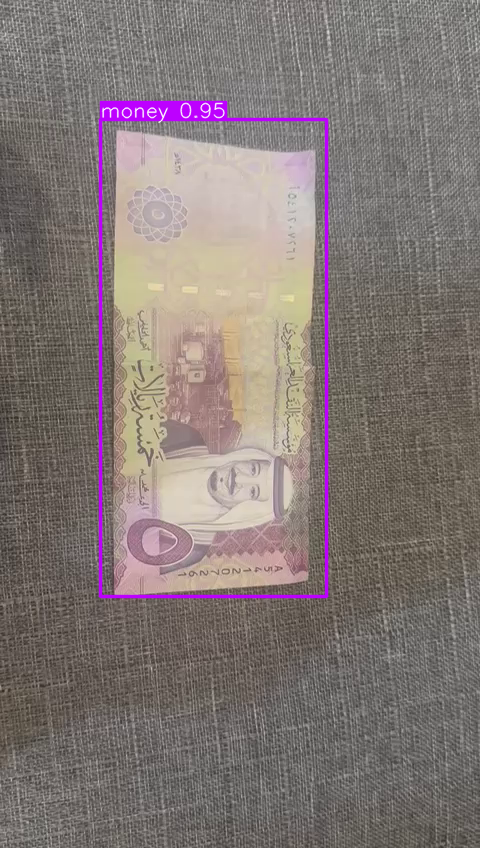

In [13]:
test2= model.predict('/content/money.mp4', save=True)
test2[0].show()

In [ ]:
import cv2

In [ ]:
# Initialize the webcam capture
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print('Error: Camera not accessible or not found.')
    exit()

print('Press q to stop.')

frame_skip = 3
frame_count = 0

# The while loop checks if cap is opened
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print('Error: Unable to read frame.')
        break

    frame_count += 1
    if frame_count % frame_skip == 0:
        results = model.predict(source=frame, verbose=False)
        annotated_frame = results[0].plot()

        # Use cv2.imshow to display the frame
        cv2.imshow('Annotated Frame', annotated_frame)

    # Check for the 'q' key entry to stop the capture
    if cv2.waitKey(10) & 0xFF == ord('q'):
        print('Quitting.')
        break

# Release the webcam and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()